In [2]:
# conventional way to import pandas
import pandas as pd

In [3]:
import matplotlib as plt

In [4]:
 C:/Users/adm/Documents/Python Scripts/Dataset/Advertising.csv')

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [5]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [7]:
# conventional way to import seaborn
import seaborn as sns

In [8]:
# allow plots to appear within the notebook
%matplotlib inline

In [9]:
import warnings
warnings.filterwarnings('ignore')

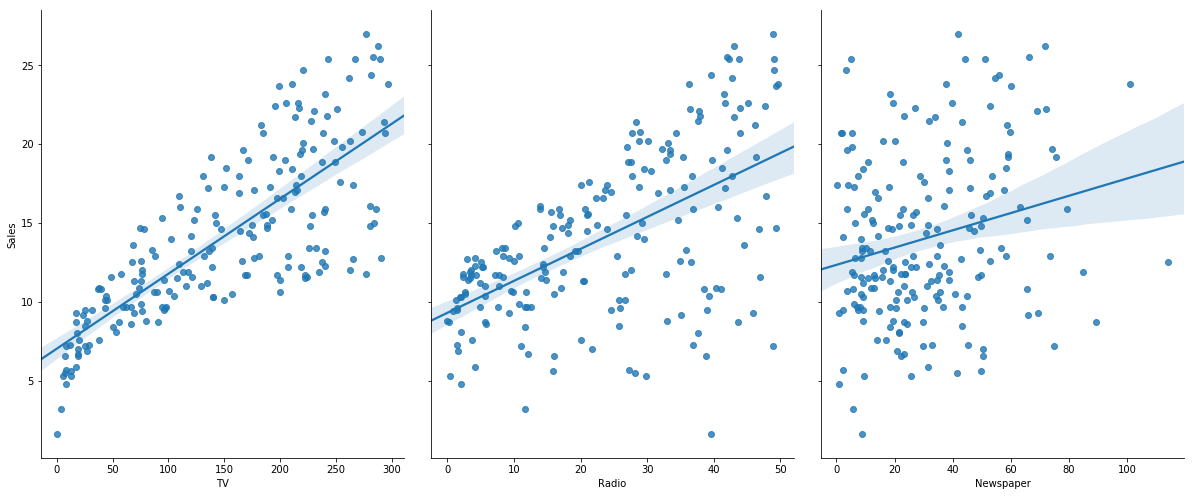

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8, kind='reg')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [11]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# # equivalent command to do this in one line
# X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [14]:
# check the type and shape of y
print(y.shape)

(200,)


## Splitting X and y into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [18]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [20]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [21]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

3.189486918009912
[0.04535562 0.18319738 0.00453019]


**Sales = 2.8769666223179318 + TV * 0.04656457 + Newspaper * 0.17915812 + Radio * 0.00345046**

In [52]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04685926026057878),
 ('Radio', 0.18131103686133399),
 ('Newspaper', 0.004146725005421156)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [22]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred[:5]

array([13.99058152,  9.50758367,  6.91724455, 15.33143648, 18.46540316])

In [23]:
y_test[:5]

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
Name: Sales, dtype: float64

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [24]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [25]:
# calculate MSE by hand
from sklearn import metrics
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [26]:
# calculate RMSE by hand
import numpy as np
#from sklearn import metrics #works
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [27]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.3776808256810975


In [28]:
metrics.r2_score(y_test, y_pred)

0.7558194773721318

## Feature selection

Let's **remove one variable at a time** from the model and check the RMSE!

In [29]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

metrics.r2_score(y_test, y_pred)

1.3879034699382888


0.9176214942248908

In [30]:
# create a Python list of feature names
feature_cols = ['TV', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

metrics.r2_score(y_test, y_pred)

3.352056334433862


0.5194727680455272

In [31]:
# create a Python list of feature names
feature_cols = ['Newspaper', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

metrics.r2_score(y_test, y_pred)

3.748697497467727


0.399025313368911

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

# Desicion Making

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

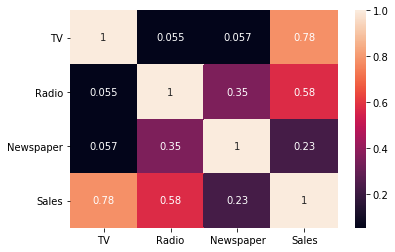

In [33]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# #heat_map=plt.gcf()
# heat_map.set_size_inches(20,15)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

In [37]:
# create a Python list of feature names
feature_cols = ['Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

metrics.r2_score(y_test, y_pred)

3.7184061815421234


0.40869841407191576